In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/세미프로젝트/data/구별_합본.csv', encoding='euc-kr')
y = data['Unnamed: 0']
data = data.drop('Unnamed: 0', axis = 1)
data

,비상소화장치 설치개수,서울시 주택 비율,인구밀도(명/km^2),재산피해,노후 주택 수,소방관 1명당 담당인구,화재발생건수,안전센터 1개소당 담당인구,위험물 저장소 개수,위험물 제작소 개수
0,65,65.983764,13932,2767956,24073,1454,437,88184,172,59
1,87,63.813746,18841,681957,20483,1534,194,76678,23,42
2,106,63.805248,12414,502071,39806,1219,155,73415,16,26
3,52,57.850339,13723,523453,40600,1795,223,94861,161,77
4,169,55.976360,16838,469973,43306,1776,305,121688,45,33
5,64,53.874021,20582,354718,27190,1520,145,112472,24,28
6,71,50.048582,20656,720757,29845,1292,222,65886,38,54
7,29,48.382956,18517,630581,17727,1228,214,114821,44,36
8,48,45.236513,14191,463000,15808,1819,169,100747,32,25
9,54,44.832313,14987,248534,25269,1332,159,77924,16,29


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(data)
scaler_data = scaler.transform(data)

In [ ]:
pca = PCA(n_components = 4)
pca.fit(scaler_data)

PCA(n_components=4)

In [ ]:
data2 = pd.DataFrame(data = pca.transform(scaler_data), columns=['pc1', 'pc2','3', '4'])

In [ ]:
data2

,pc1,pc2,3,4
0,-3.681836,4.533928,0.414634,-1.741758
1,-0.278450,-0.529960,-0.940222,-1.551275
2,0.707516,-1.065549,1.193180,-1.888485
3,-2.769535,0.792011,1.011904,0.965632
4,-1.511739,-1.230581,2.331214,-0.858451
5,-0.302621,-2.105804,-0.728832,-0.898775
6,-0.399143,-0.062084,-0.598888,-0.360771
7,-0.515739,-0.546177,-1.430550,-0.762218
8,-0.000454,-1.136307,-1.049022,-0.659913
9,0.869617,-1.130507,-0.582938,-0.623355


In [ ]:
sum(pca.explained_variance_ratio_)

0.800300502704076

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = []   # k 가 몇개인지
y = []   # 응집도가 몇인지

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)

    x.append(k)
    y.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

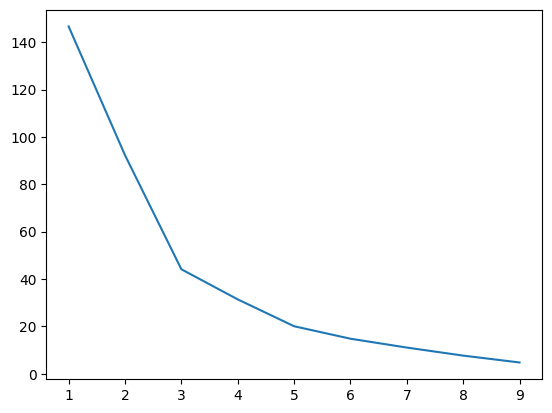

In [ ]:
plt.plot(x, y)

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans.fit(data2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
data2['labels'] = kmeans.predict(data2)

In [ ]:
data2.head()

,pc1,pc2,labels
0,-3.681836,4.533928,1
1,-0.278450,-0.529960,0
2,0.707516,-1.065549,0
3,-2.769535,0.792011,1
4,-1.511739,-1.230581,0


<Axes: xlabel='pc1', ylabel='pc2'>

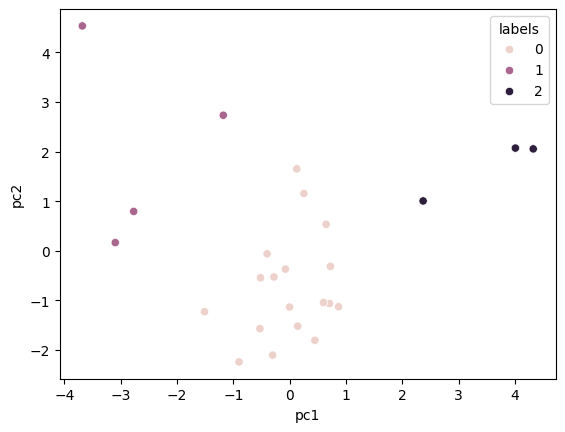

In [ ]:
sns.scatterplot(x='pc1', y='pc2', hue='labels', data=data2)

In [ ]:
cond = data2['labels'] == 1
data[cond]

,비상소화장치 설치개수,서울시 주택 비율,인구밀도(명/km^2),재산피해,노후 주택 수,소방관 1명당 담당인구,화재발생건수,안전센터 1개소당 담당인구,위험물 저장소 개수,위험물 제작소 개수
20,135,30.138050,10386,294133,24462,868,207,43730,68,32
22,268,26.272179,6292,423169,24094,474,191,23563,84,24
23,224,24.922857,13232,1152796,11550,435,190,24087,24,32


In [ ]:
data

,비상소화장치 설치개수,서울시 주택 비율,인구밀도(명/km^2),재산피해,노후 주택 수,소방관 1명당 담당인구,화재발생건수,안전센터 1개소당 담당인구,위험물 저장소 개수,위험물 제작소 개수
0,65,65.983764,13932,2767956,24073,1454,437,88184,172,59
1,87,63.813746,18841,681957,20483,1534,194,76678,23,42
2,106,63.805248,12414,502071,39806,1219,155,73415,16,26
3,52,57.850339,13723,523453,40600,1795,223,94861,161,77
4,169,55.976360,16838,469973,43306,1776,305,121688,45,33
5,64,53.874021,20582,354718,27190,1520,145,112472,24,28
6,71,50.048582,20656,720757,29845,1292,222,65886,38,54
7,29,48.382956,18517,630581,17727,1228,214,114821,44,36
8,48,45.236513,14191,463000,15808,1819,169,100747,32,25
9,54,44.832313,14987,248534,25269,1332,159,77924,16,29


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/세미프로젝트/data/구별_합본.csv', encoding='euc-kr')
y = data['Unnamed: 0']
data = data.drop('Unnamed: 0', axis = 1)
y

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: Unnamed: 0, dtype: object